<a href="https://colab.research.google.com/github/RoseMwangi98/CARREFOUR_ANALYSIS/blob/main/Associative_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEFINING THE QUESTION**

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

**Part 3: Association Rules**

This section will require that you create association rules that will allow you to identify relationships between variables in the dataset. You are provided with a separate dataset that comprises groups of items that will be associated with others. Just like in the other sections, you will also be required to provide insights for your analysis.

In [2]:
#installing the required libraries
# We first we install the required arules library 
#
install.packages("arules")


# Loading the arules library
#
library(arules)
library(tidyverse)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks arules::recode()
✖ tidyr::unpack() masks Matrix::unpack()



In [3]:
#loading our dataset as a transaction.
dataset <- read.transactions("http://bit.ly/SupermarketDatasetII" ,  
                                   sep =",")


Warning message in asMethod(object):
“removing duplicated items in transactions”


In [4]:
# Generating a summary of the transaction dataset

# This would give us some information such as the most purchased items, 
# distribution of the item sets (no. of items purchased in each transaction), etc.
summary(dataset)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [5]:
class(dataset)

[1] "transactions"
attr(,"package")
[1] "arules"

In [6]:
# Previewing our first 5 transactions
inspect(dataset [1:6])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 
[6] {low fat yogurt}   


In [7]:
items<-as.data.frame(itemLabels(dataset))
colnames(items) <- "Item"
head(items, 10)

,Item
,<chr>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [8]:
# Exploring the frequency of some articles 

itemFrequency(dataset[, 1:20],type = "absolute")

almonds antioxydant juice         asparagus           avocado 
              153                67                36               250 
      babies food             bacon    barbecue sauce         black tea 
               34                65                81               107 
      blueberries        body spray           bramble          brownies 
               69                86                14               253 
        bug spray      burger sauce           burgers            butter 
               65                44               654               226 
             cake        candy bars           carrots       cauliflower 
              608                73               115                36

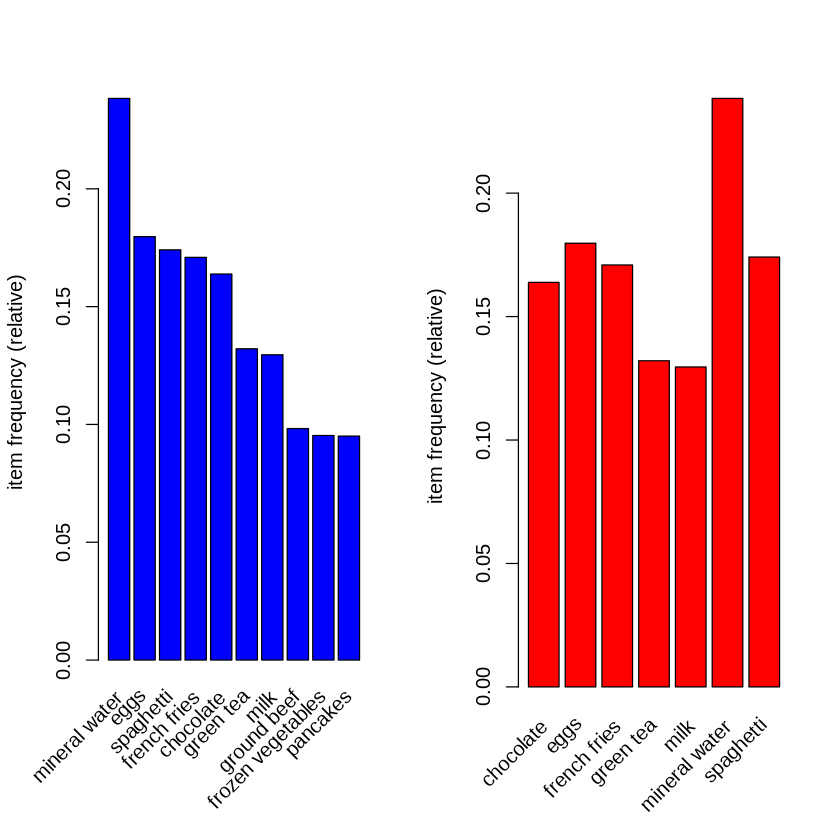

In [9]:
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(dataset, topN = 10,col="blue")
itemFrequencyPlot(dataset, support = 0.1,col="red")

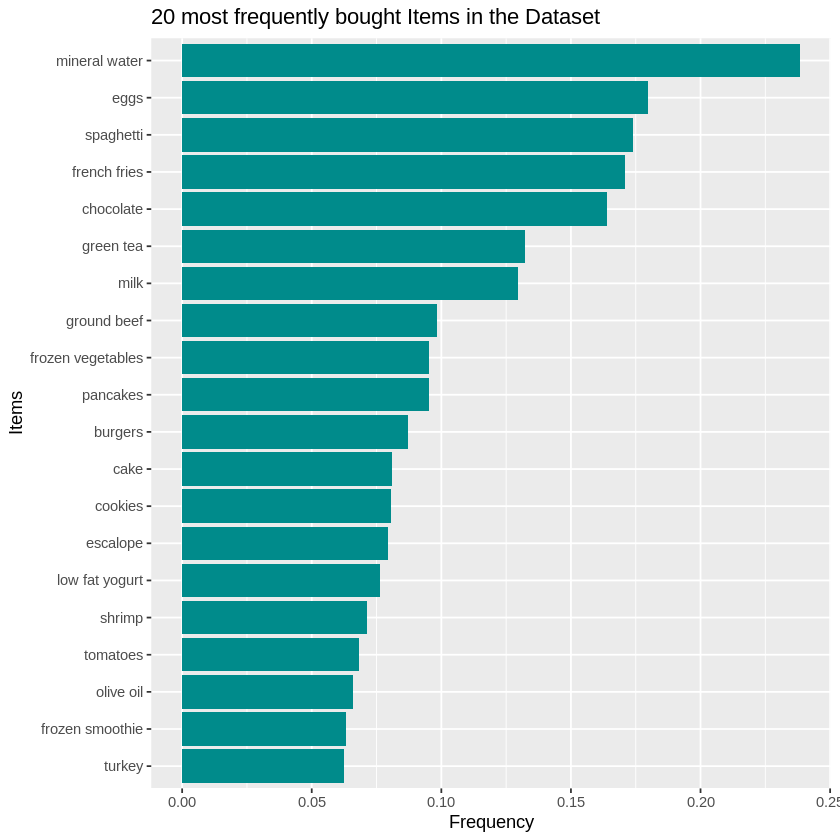

In [10]:
itemFrequencyGGPlot <- function(x, topN) {
  library(tidyverse)
  x %>%
    itemFrequency %>%
    sort %>%
    tail(topN) %>%
    as.data.frame %>%
    tibble::rownames_to_column() %>%
    ggplot(aes(reorder(rowname, `.`),`.`)) + 
    geom_col(fill='cyan4') + labs(title='20 most frequently bought Items in the Dataset' , y  = "Frequency" , x = 'Items')+
    coord_flip()
}  
itemFrequencyGGPlot(dataset, 20)

In [11]:
# Building a model based on association rules 
# using the apriori function 
# ---
# We use Min Support as 0.001 and confidence as 0.8
# ---
# 
rules <- apriori (dataset, parameter = list(supp = 0.001, conf = 0.7))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [200 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 200 rules 

In [12]:
# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (dataset,parameter = list(supp = 0.002, conf = 0.8)) 

# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (dataset, parameter = list(supp = 0.001, conf = 0.6)) 

rules2

rules3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbos

set of 2 rules 

set of 545 rules 

In [13]:
summary(rules)

set of 200 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6 
 44 122  33   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   3.955   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.7000   Min.   :0.001067   Min.   : 2.937  
 1st Qu.:0.001067   1st Qu.:0.7273   1st Qu.:0.001466   1st Qu.: 3.088  
 Median :0.001200   Median :0.7500   Median :0.001466   Median : 3.616  
 Mean   :0.001330   Mean   :0.7767   Mean   :0.001728   Mean   : 4.160  
 3rd Qu.:0.001466   3rd Qu.:0.8139   3rd Qu.:0.001866   3rd Qu.: 4.418  
 Max.   :0.003066   Max.   :1.0000   Max.   :0.004133   Max.   :12.722  
     count      
 Min.   : 8.00  
 1st Qu.: 8.00  
 Median : 9.00  
 Mean   : 9.98  
 3rd Qu.:11.00  
 Max.   :23.00  

mining info:
    data ntransactions support confidence
 dataset          7501   0.001        0.7

In [14]:
# Observing rules built in our model i.e. first 5 model rules
# ---
# 
inspect(rules[1:5])

    lhs                          rhs             support     confidence
[1] {frozen smoothie,spinach} => {mineral water} 0.001066524 0.8888889 
[2] {spaghetti,spinach}       => {mineral water} 0.001333156 0.7142857 
[3] {olive oil,strong cheese} => {spaghetti}     0.001066524 0.7272727 
[4] {milk,strong cheese}      => {mineral water} 0.001599787 0.7058824 
[5] {green beans,ground beef} => {spaghetti}     0.001066524 0.7272727 
    coverage    lift     count
[1] 0.001199840 3.729058  8   
[2] 0.001866418 2.996564 10   
[3] 0.001466471 4.177085  8   
[4] 0.002266364 2.961311 12   
[5] 0.001466471 4.177085  8   


In [15]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
# We can also use different criteria such as: (by = "lift" or by = "support")
# 
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


In [16]:
#I used the quality() function to check the quality of the rules of my model.

head(quality(rules))

tail(quality(rules))

,support,confidence,coverage,lift,count
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
46,0.001066524,1.0000000,0.001066524,12.606723,8
58,0.001199840,1.0000000,0.001199840,4.195190,9
62,0.001066524,1.0000000,0.001066524,7.717078,8
154,0.001199840,1.0000000,0.001199840,4.195190,9
17,0.002532996,0.9500000,0.002666311,11.976387,19
38,0.001866418,0.9333333,0.001999733,3.915511,14


,support,confidence,coverage,lift,count
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
116,0.001599787,0.7058824,0.002266364,2.961311,12
130,0.001599787,0.7058824,0.002266364,4.054229,12
153,0.001599787,0.7058824,0.002266364,2.961311,12
14,0.001866418,0.7000000,0.002666311,2.936633,14
30,0.001866418,0.7000000,0.002666311,2.936633,14
162,0.002799627,0.7000000,0.003999467,2.936633,21


In [17]:
# If we're interested in making a promotion relating to the sale of milk, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing milk
# 
milk <- subset(rules, subset = rhs %pin% "milk")
 
# Then order by confidence
milk<-sort(milk, by="confidence", decreasing=TRUE)
inspect(milk[1:5])

    lhs                                  rhs    support     confidence
[1] {cake,meatballs,mineral water}    => {milk} 0.001066524 1.0000000 
[2] {escalope,hot dogs,mineral water} => {milk} 0.001066524 0.8888889 
[3] {meatballs,whole wheat pasta}     => {milk} 0.001333156 0.8333333 
[4] {black tea,frozen smoothie}       => {milk} 0.001199840 0.8181818 
[5] {burgers,ground beef,olive oil}   => {milk} 0.001066524 0.8000000 
    coverage    lift     count
[1] 0.001066524 7.717078  8   
[2] 0.001199840 6.859625  8   
[3] 0.001599787 6.430898 10   
[4] 0.001466471 6.313973  9   
[5] 0.001333156 6.173663  8   


In [24]:
# What if we wanted to determine items that customers might buy 
# who have previously bought milk?
# ---
# 
# Subset the rules
milk <- subset(rules, subset = lhs %pin% "milk")

# Order by confidenc
milk<-sort(milk, by="confidence", decreasing=TRUE)

# inspect top 10
inspect(milk[15:25])

     lhs                    rhs                 support confidence    coverage     lift count
[1]  {chocolate,                                                                             
      hot dogs,                                                                              
      milk}              => {mineral water} 0.001066524  0.8000000 0.001333156 3.356152     8
[2]  {avocado,                                                                               
      burgers,                                                                               
      milk}              => {spaghetti}     0.001066524  0.8000000 0.001333156 4.594793     8
[3]  {cookies,                                                                               
      green tea,                                                                             
      milk}              => {french fries}  0.001066524  0.8000000 0.001333156 4.680811     8
[4]  {cake,                                                 

In [26]:
# What if we wanted to determine items that customers might buy 
# who have previously bought milk?
# ---
# 
# Subset the rules
eggs <- subset(rules, subset = lhs %pin% "eggs")

# Order by confidenc
eggs<-sort(eggs, by="confidence", decreasing=TRUE)

# inspect top 10
inspect(eggs[15:17])

    lhs                              rhs             support     confidence
[1] {chocolate,eggs,tomato sauce} => {mineral water} 0.001066524 0.7272727 
[2] {eggs,ham,milk}               => {french fries}  0.001066524 0.7272727 
[3] {chocolate,eggs,red wine}     => {spaghetti}     0.001066524 0.7272727 
    coverage    lift     count
[1] 0.001466471 3.051047 8    
[2] 0.001466471 4.255283 8    
[3] 0.001466471 4.177085 8    


In [ ]:
devtools::install_github("mhahsler/arulesViz")

openssl      (1.4.3 -> 1.4.4  ) [CRAN]
later        (NA    -> 1.2.0  ) [CRAN]
lazyeval     (NA    -> 0.2.2  ) [CRAN]
rle          (NA    -> 0.9.2  ) [CRAN]
coda         (NA    -> 0.19-4 ) [CRAN]
network      (NA    -> 1.16.1 ) [CRAN]
statnet.c... (NA    -> 4.4.1  ) [CRAN]
zoo          (NA    -> 1.8-9  ) [CRAN]
bitops       (NA    -> 1.0-7  ) [CRAN]
caTools      (NA    -> 1.18.2 ) [CRAN]
gtools       (NA    -> 3.8.2  ) [CRAN]
gridExtra    (NA    -> 2.3    ) [CRAN]
viridis      (NA    -> 0.6.1  ) [CRAN]
iterators    (NA    -> 1.0.13 ) [CRAN]
foreach      (NA    -> 1.5.1  ) [CRAN]
htmlwidgets  (NA    -> 1.5.3  ) [CRAN]
promises     (NA    -> 1.2.0.1) [CRAN]
crosstalk    (NA    -> 1.1.1  ) [CRAN]
sna          (NA    -> 2.6    ) [CRAN]
igraph       (NA    -> 1.2.6  ) [CRAN]
ggrepel      (NA    -> 0.9.1  ) [CRAN]
lmtest       (NA    -> 0.9-38 ) [CRAN]
registry     (NA    -> 0.5-1  ) [CRAN]
gplots       (NA    -> 3.1.1  ) [CRAN]
dendextend   (NA    -> 1.15.1 ) [CRAN]
gclus        (NA    -> 1.

Installing 35 packages: openssl, later, lazyeval, rle, coda, network, statnet.common, zoo, bitops, caTools, gtools, gridExtra, viridis, iterators, foreach, htmlwidgets, promises, crosstalk, sna, igraph, ggrepel, lmtest, registry, gplots, dendextend, gclus, qap, TSP, visNetwork, plotly, DT, ggnetwork, scatterplot3d, vcd, seriation

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpdeTz88/remotes3b2fdaf033/mhahsler-arulesViz-fb9f861/DESCRIPTION’
─  preparing ‘arulesViz’:
✔  checking DESCRIPTION meta-information
─  installing the package to process help pages
─  saving partial Rd database (8.1s)
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘arulesViz/README’
─  building ‘arulesViz_1.5-1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



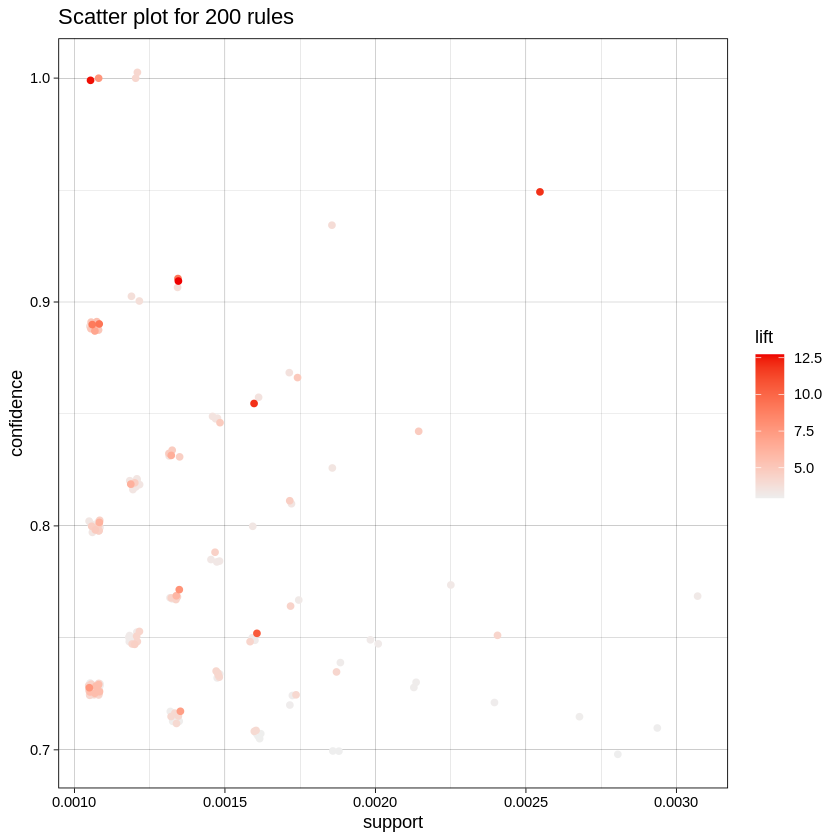

In [ ]:
# Visualizing association rules using the arulesviz package

#In order to gain more insights from my model , I used the arulesviz package to visualize the first fifteen rules created from the parameters of my model.

#install.packages("arulesViz")
library(arulesViz)

## Scatterplot with custom colors
library(colorspace) 
# for sequential_hcl
plot(rules)


HTML widgets cannot be represented in plain text (need html)

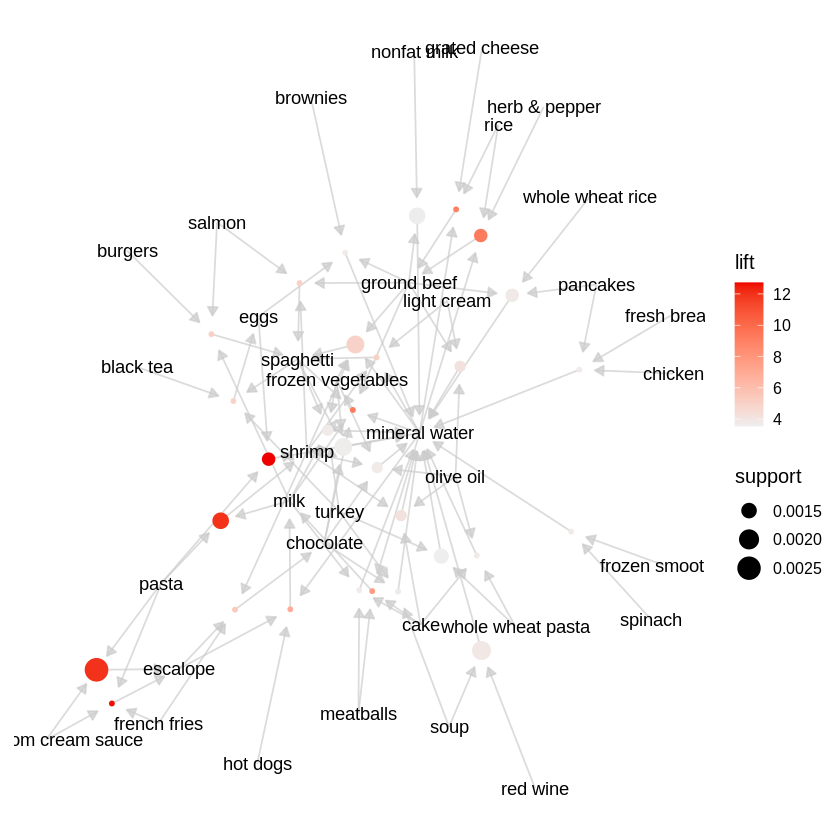

In [ ]:

#I noted that there was one rule with high lift , it also had low confidence and low support

#I created a subrules variable that had the first thirty rules of the model.
#I used the htmlwidget to create an interactive plot of the subrules.

subrules <- head(rules, n = 30, by = "confidence")
plot(subrules, method = "graph" ,   engine = "htmlwidget")

#For instance from rule 15 , people buying cake , meatballs and milk were also likely to buy mineral water.

#I also plotted the graph , with the default engine.
#Many arrows tend to point towards the Mineral water , meaning many of the purchases were associated with the purchase of mineral water.

plot(subrules, method = "graph" ,   engine = "default")

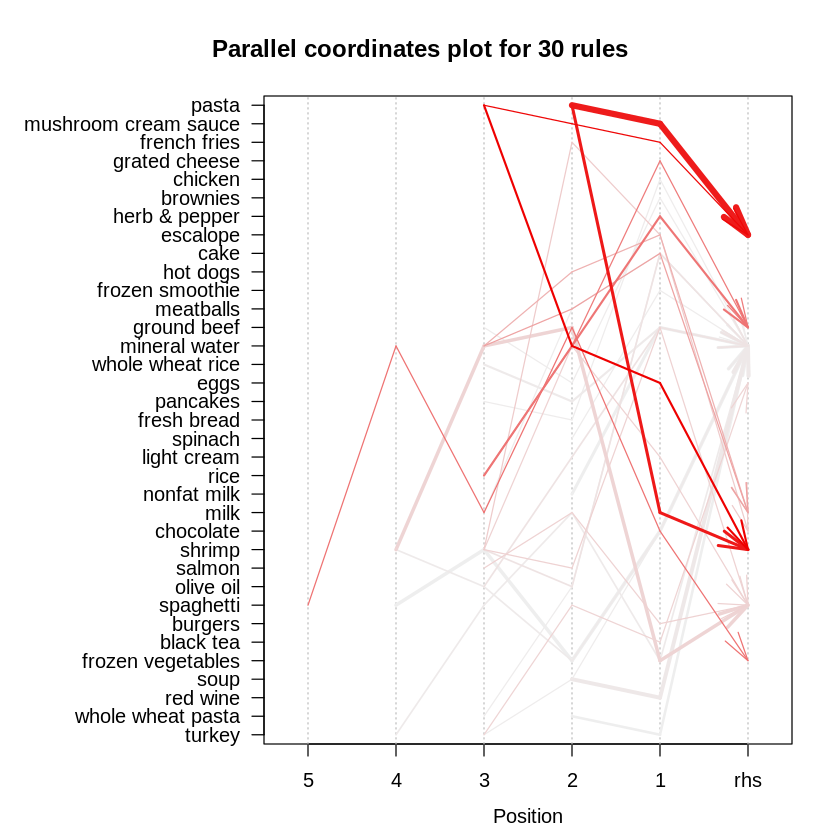

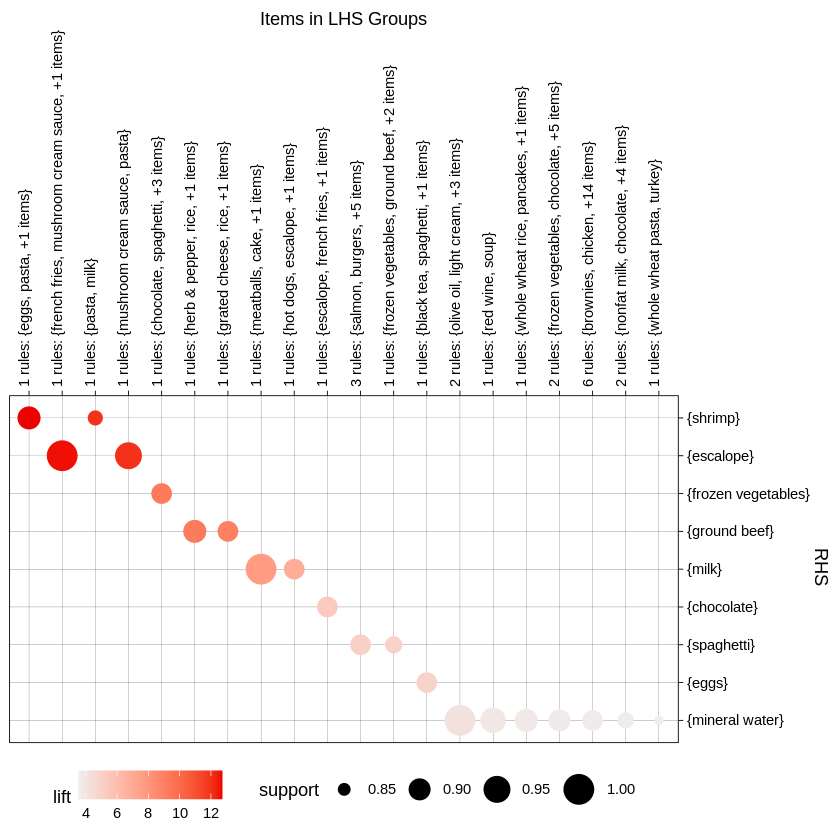

In [ ]:
#I also used the paracoord method to plot out my subrules

plot(subrules, method = "paracoord")


## 2D matrix with shading
plot(subrules,method="grouped", measure="confidence", engine ="default" )